In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.linalg import eigvalsh, eigh

import algo
import utils
import interactions
import dicke

In [18]:
def ising_mag(J0s, wz, alpha, gs, beta, N, M):
    return np.abs(np.array([algo.lrising_mags(wz, J0, alpha, gs, beta, N, M)[0] for J0 in J0s]))

[-7.45191314e-09 -7.45358003e-09 -7.45765094e-09 -7.46079532e-09
 -7.45247185e-09 -7.47546857e-09 -7.48105272e-09 -7.30534365e-09
 -7.64251314e-09]
[-7.44993443e-09 -7.44913937e-09 -7.45374809e-09 -7.45331789e-09
 -7.44172736e-09 -7.47275916e-09 -7.45239303e-09 -7.10237209e-09
 -6.90490144e-09]
[-7.45088896e-09 -7.44897305e-09 -7.45451008e-09 -7.45900010e-09
 -7.45323635e-09 -7.49262267e-09 -7.50873832e-09 -6.95171697e-09
 -7.74303793e-09]
[-7.45223447e-09 -7.45660978e-09 -7.46582577e-09 -7.46554898e-09
 -7.47549327e-09 -7.49756256e-09 -7.55389055e-09 -6.78181690e-09
 -7.26730924e-09]
[-7.45407519e-09 -7.45257562e-09 -7.46493687e-09 -7.48318311e-09
 -7.44584656e-09 -7.51447085e-09 -7.55966099e-09 -6.60185848e-09
 -5.24802695e-09]
[-7.45087036e-09 -7.45017190e-09 -7.46191608e-09 -7.49546787e-09
 -7.47578635e-09 -7.45791558e-09 -7.58761782e-09 -6.67717958e-09
 -5.87848263e-09]
[-7.45695292e-09 -7.45520532e-09 -7.49620792e-09 -7.56137730e-09
 -7.51468374e-09 -7.53623146e-09 -7.74916765e-0

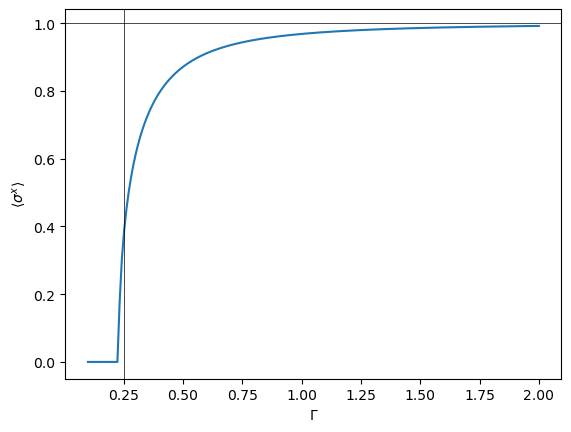

In [24]:
N = 10
M = int(np.sqrt(N) * np.log(N))
beta = 10
wz = 1
J0s = np.linspace(0.1, 2.0, 200)
alpha = 0.3

gs = 0.00 * np.ones(N)

J = interactions.powerlaw_obc(N, alpha)
J = interactions.shift(J, 0.0)

mags = []
for J0 in J0s:
    J = J0 * interactions.rescale(J)
    ws, lams = utils.dicke_from_ising(J, 1e-6)
    #print(ws[-1] * J0)
    #print(np.sqrt(N) * lams[:, 0])
    #plt.imshow(lams)
    #plt.show()
    #ws, lams = utils.truncate_dicke(ws, lams, M)
    mags.append(dicke.mag_longitudinal_hessian_debug(beta, wz, ws, np.sqrt(N) * lams, gs, N)[0])
mags = np.abs(np.array(mags))

plt.plot(J0s, mags)
plt.axvline(0.25, c='k', lw=0.5)
plt.axhline(1.00, c='k', lw=0.5)
plt.xlabel(r'$\Gamma$')
plt.ylabel(r'$\langle \sigma^x \rangle$')
plt.show()

Rounds to go: 2, current critical point:  0.6241379310344827 ...
Rounds to go: 1, current critical point:  0.659080459770115 ...


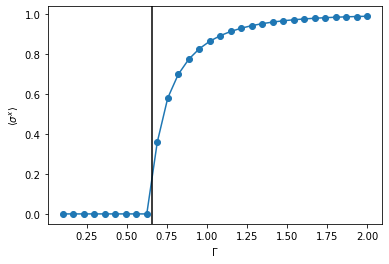

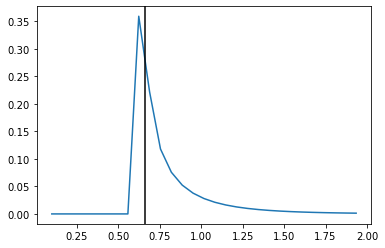

In [4]:
marker_kwargs = {'c': 'k',
                 'lw': 0,
                 'marker': 'o',
                 'fillstyle': 'none',
                 'markevery': 3,
                 'markersize': 10,
                 'markeredgewidth': 1.5,
                }

N = 70
M = int(np.sqrt(N) * np.log(N))
beta = 1 / 1.25
wz = 1
J0s = np.linspace(0.1, 2, 30)
alpha = 0.5

gs = 0.0 * np.ones(N)

plt.plot(J0s, ising_mag(J0s, wz, alpha, gs, beta, N, M), marker='o')
plt.xlabel(r'$\Gamma$')
plt.ylabel(r'$\langle \sigma^x \rangle$')

critical_J0 = utils.critical_point_recursive_refinement(ising_mag, J0s, [wz, alpha, gs, beta, N, M], rounds=3, verbose=True)
plt.axvline(critical_J0, c='k')

plt.show()

op = ising_mag(J0s, wz, alpha, gs, beta, N, M)
rel_diff = (op[1:] - op[:-1])

plt.plot(J0s[:-1], rel_diff)
plt.axvline(critical_J0, c='k')
plt.show()

$\alpha_\chi =$  0.517792429998757
[0.51779243 0.02216849]


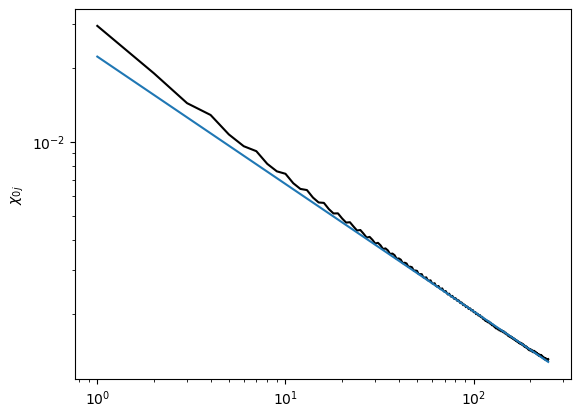

In [4]:
def correlation_length_fit(r, l, A):
    return A * r**(-l) 

N = 500
beta = 1 / 0.05
wz = 1
J0 = 0.1
alpha = 0.7
M = round(N**np.tanh(2*alpha**(1/2)))

gs = 0.0 * np.ones(N)
dg = 5e-3 * wz

i = 0
   
gs = 0.0 * np.ones(N)
mxs0 = algo.lrising_mags(wz, J0, alpha, gs, beta, N, M)
gs[i] = dg
mxs1 = algo.lrising_mags(wz, J0, alpha, gs, beta, N, M)
susc = ((mxs1 - mxs0) / dg)

rs = np.arange(1, N//2, 1)
fit_start = N//8
fit_rs = np.arange(fit_start, 4*N//8, 1)
plt.plot(rs, susc[1:N//2], c='k')
popt, pcov = curve_fit(correlation_length_fit, fit_rs, susc[fit_start:4*N//8], p0=[1, 1])
print(r'$\alpha_\chi =$ ', popt[0])
print(popt)
plt.plot(rs, correlation_length_fit(rs, *popt))

#ax.axvline(0.25, c='k', lw=0.5)
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\chi_{0j}$')
plt.show()

500 328
$\alpha_\chi =$  0.5223621307177839
[0.52236213 0.02260419]


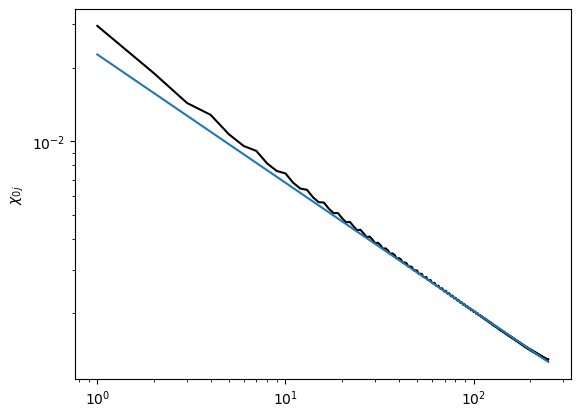

In [11]:
def correlation_length_fit(r, l, A):
    return A * r**(-l) 

N = 500
beta = 1 / 0.05
wz = 1
J0 = 0.1
alpha = 0.7
M = round(N**np.tanh(2*alpha**(1/2)))
print(N, M)

i = 0

susc = algo.chirs_f_alt(wz, J0, alpha, beta, N, M)

rs = np.arange(1, N//2, 1)
fit_start = N//8
fit_end = 4*N//8
fit_rs = np.arange(fit_start, fit_end, 1)
plt.plot(rs, susc[1:N//2], c='k')
popt, pcov = curve_fit(correlation_length_fit, fit_rs, susc[fit_start:fit_end], p0=[1, 1])
print(r'$\alpha_\chi =$ ', popt[0])
print(popt)
plt.plot(rs, correlation_length_fit(rs, *popt))

#ax.axvline(0.25, c='k', lw=0.5)
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\chi_{0j}$')
plt.show()

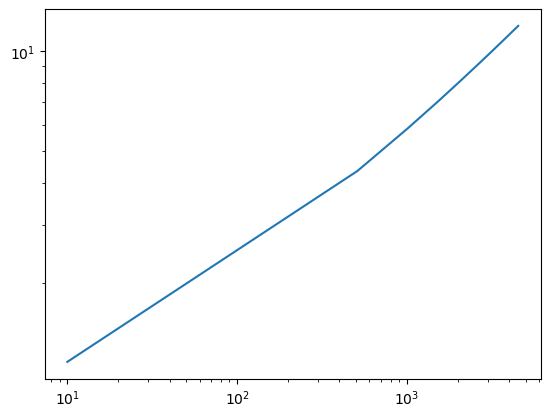

In [16]:
Ns = np.arange(10, 5000, 500)
beta = 1 / 0.05
wz = 1
J0 = 0.1
alpha = 0.5
i = 0
j = 3

susc = []
for N in Ns:    
    M = round(N**np.tanh(2*alpha**(1/2)))
    susc.append(N * algo.chi_ij_f_alt(i, j, wz, J0, alpha, beta, N, M))
    
plt.plot(Ns, susc)
plt.yscale('log')
plt.xscale('log')
plt.show()
    

0.0008221515108215053 -1.189009267541963e-05


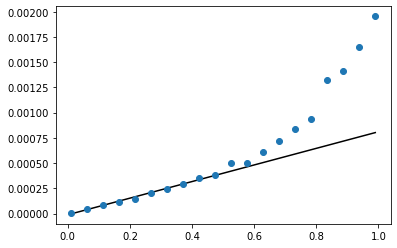

In [84]:
marker_kwargs = {'c': 'k',
                 'lw': 0,
                 'marker': 'o',
                 'fillstyle': 'none',
                 'markevery': 3,
                 'markersize': 10,
                 'markeredgewidth': 1.5,
                }

N = 500
M = int(np.sqrt(N) * np.log(N))
wz = 1
beta = 1 / 0.05
J0 = 0.25

gs = 0.0 * np.ones(N)
dg = 5e-3 * wz

i = 0

alphas = np.linspace(0.01, 0.99, 20)
crit_exp = []
for alpha in alphas:
    gs = 0.0 * np.ones(N)
    mxs0 = algo.lrising_mags(wz, J0, alpha, gs, beta, N, M)
    gs[i] = dg
    mxs1 = algo.lrising_mags(wz, J0, alpha, gs, beta, N, M)
    susc = ((mxs1 - mxs0) / dg)

    fit_start = N//8
    #rs = np.arange(1, N//2, 1)
    #ax.plot(rs, susc[1:N//2], c='k')
    popt, pcov = curve_fit(correlation_length_fit, np.arange(fit_start,4*N//8, 1), susc[fit_start:4*N//8], p0=[1, 1])
    crit_exp.append(popt[0])
    
    
def correlation_decay_fit(x, m, n):
    return x*m + n

popt, pcov = curve_fit(correlation_decay_fit, alphas[:2*len(alphas)//4], crit_exp[:2*len(alphas)//4], p0=(1, 0))
print(*popt)
plt.plot(alphas, correlation_decay_fit(alphas, *popt), c='k')
plt.plot(alphas, crit_exp, lw=0, marker='o')
plt.show()

In [60]:
0.670866014377453
0.6635922496836434
0.6648414045219964
0.66985033482133


0.66985033482133

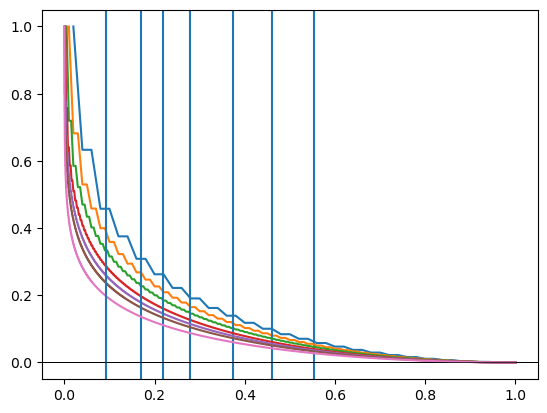

In [54]:
Ns = [50, 100, 200, 500, 1000, 2000, 10000]
alpha = 1.0

from scipy.linalg import eigh

for N in Ns:
    Jbase = interactions.powerlaw_pbc(N, alpha)
    Jbase = interactions.shift(Jbase, 0.)
    Jbase = interactions.rescale(Jbase)

    vals = eigh(Jbase, eigvals_only=True)
    plt.plot(np.arange(1, len(vals) + 1) / N, vals[::-1]) 
    plt.axvline(np.sqrt(N) * np.log(N) / N)
    plt.axhline(0, lw=0.5, c='k')
    
plt.show()

[0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678]
[0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678 0.70710678 0.707

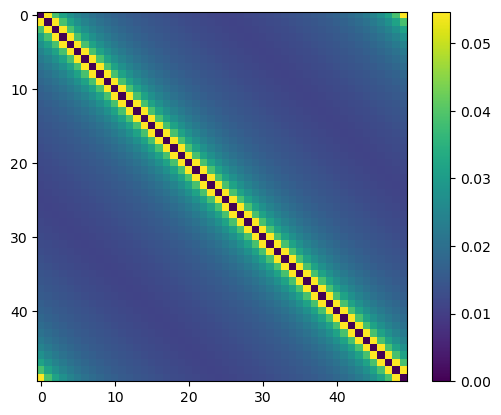

Eigvals: [-8.64813976e-20  3.45993093e-17  1.16453940e-04  5.29854067e-04
  5.29854067e-04  8.25102952e-04  8.25102952e-04  1.79179806e-03
  1.79179806e-03  2.51874527e-03  2.51874527e-03  3.97115055e-03
  3.97115055e-03  5.17509433e-03  5.17509433e-03  7.19606126e-03
  7.19606126e-03  8.95619671e-03  8.95619671e-03  1.16792232e-02
  1.16792232e-02  1.41256957e-02  1.41256957e-02  1.77671954e-02
  1.77671954e-02  2.11148223e-02  2.11148223e-02  2.60401511e-02
  2.60401511e-02  3.06593410e-02  3.06593410e-02  3.75315842e-02
  3.75315842e-02  4.41144773e-02  4.41144773e-02  5.42815383e-02
  5.42815383e-02  6.43005280e-02  6.43005280e-02  8.10490371e-02
  8.10490371e-02  9.83985650e-02  9.83985650e-02  1.32882631e-01
  1.32882631e-01  1.73479868e-01  1.73479868e-01  3.15494919e-01
  3.15494919e-01  1.00000000e+00]
[8.58708602e+03 1.88731211e+03 1.88731211e+03 1.21196997e+03
 1.21196997e+03 5.58098607e+02 5.58098607e+02 3.97023078e+02
 3.97023078e+02 2.51816190e+02 2.51816190e+02 1.9323319

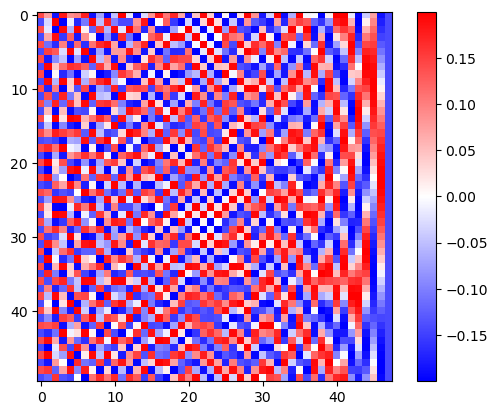



1.0000000000000002


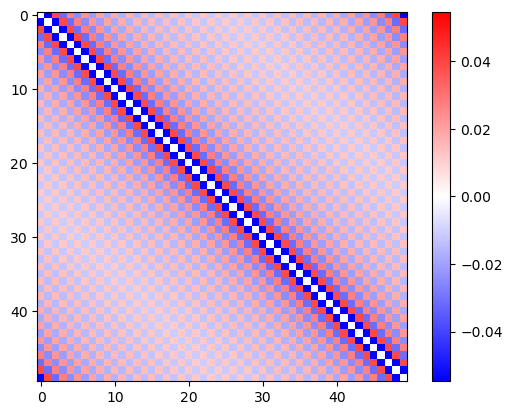

Eigvals: [-8.64813976e-20  3.45993093e-17  1.16453940e-04  5.29854067e-04
  5.29854067e-04  8.25102952e-04  8.25102952e-04  1.79179806e-03
  1.79179806e-03  2.51874527e-03  2.51874527e-03  3.97115055e-03
  3.97115055e-03  5.17509433e-03  5.17509433e-03  7.19606126e-03
  7.19606126e-03  8.95619671e-03  8.95619671e-03  1.16792232e-02
  1.16792232e-02  1.41256957e-02  1.41256957e-02  1.77671954e-02
  1.77671954e-02  2.11148223e-02  2.11148223e-02  2.60401511e-02
  2.60401511e-02  3.06593410e-02  3.06593410e-02  3.75315842e-02
  3.75315842e-02  4.41144773e-02  4.41144773e-02  5.42815383e-02
  5.42815383e-02  6.43005280e-02  6.43005280e-02  8.10490371e-02
  8.10490371e-02  9.83985650e-02  9.83985650e-02  1.32882631e-01
  1.32882631e-01  1.73479868e-01  1.73479868e-01  3.15494919e-01
  3.15494919e-01  1.00000000e+00]
[8.58708602e+03 1.88731211e+03 1.88731211e+03 1.21196997e+03
 1.21196997e+03 5.58098607e+02 5.58098607e+02 3.97023078e+02
 3.97023078e+02 2.51816190e+02 2.51816190e+02 1.9323319

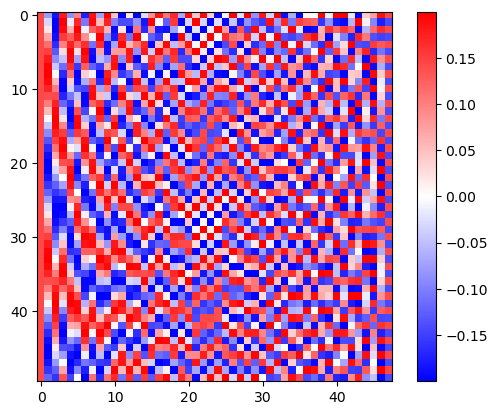

In [4]:
N = 50
M = int(np.sqrt(N) * np.log(N))
beta = 1
wz = 1
J0s = np.linspace(0.1, 2.0, 50)
alpha = 0.5

gs = 0.00 * np.ones(N)

J = interactions.powerlaw_pbc(N, alpha)
afmJ = interactions.powerlaw_pbc_afm(N, alpha)

print(np.diag(J, k=2))
print(np.diag(afmJ, k=2))
print(np.sum(J[1:, 0]))
print(np.sum(afmJ[1:, 0]))
J = interactions.shift(J, 0.0)
ds = eigvalsh(J)
#print(f'Eigvals unrescaled: {ds}')
J, S = interactions.rescale(J, return_scale=True)

plt.imshow(J - np.diag(np.diag(J)))
plt.colorbar()
plt.show()


ds = eigvalsh(J)
print(f'Eigvals: {ds}')
ws, lams = utils.dicke_from_ising(J, 1e-6)
print(ws)
plt.imshow(lams, cmap='bwr')
plt.colorbar()
plt.show()

print()
print()

afmJ = interactions.shift(afmJ, 0.0)
afmJ = afmJ/S
print(np.sum(J[0, :]))
#afmJ = interactions.rescale(afmJ)
vmax = np.amax(np.abs(afmJ - np.diag(np.diag(afmJ))))
plt.imshow(afmJ - np.diag(np.diag(afmJ)), cmap='bwr', vmin=-vmax, vmax=vmax)
plt.colorbar()
plt.show()

from scipy.linalg import eigvalsh
ds = eigvalsh(afmJ)
print(f'Eigvals: {ds}')
ws, lams = utils.dicke_from_ising(afmJ, 1e-6)
print(ws)
plt.imshow(lams, cmap='bwr')
plt.colorbar()
plt.show()

print()
print()

In [5]:
alpha = 0.3
N = 100

J = interactions.powerlaw_pbc(N, alpha)
afmJ = interactions.powerlaw_pbc_afm(N, alpha)
k = N//2 * 2*np.pi/N
print(utils.Dk_exact(J[:N//2, 0], k, N))
print(utils.Dk_exact(afmJ[:N//2, 0], k, N))

-1.4399803336770316
42.059821991877264


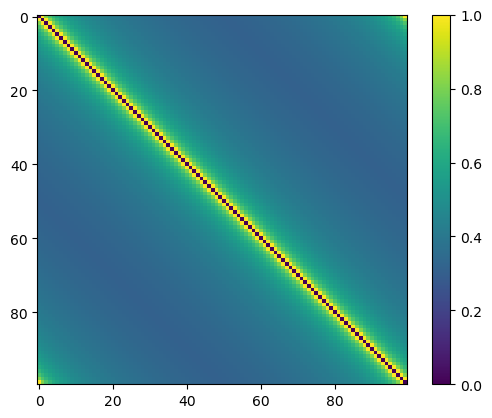

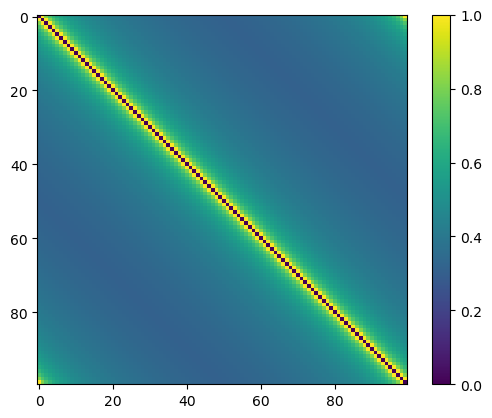

1.130730838966039
42.369071486588254


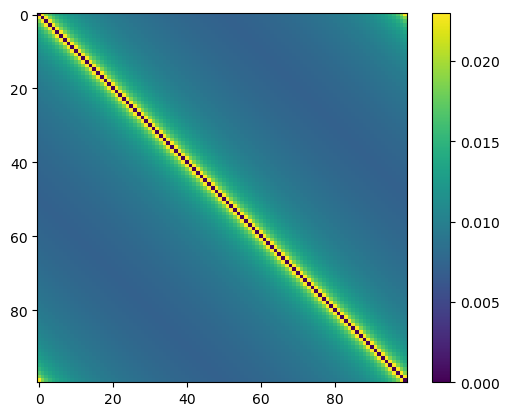

Eigvals: [1.69033665e-17 2.49058301e-05 2.49058301e-05 4.89138278e-05
 4.89138278e-05 9.91572167e-05 9.91572167e-05 9.99956898e-05
 9.99956898e-05 2.00403556e-04 2.00403556e-04 2.26402708e-04
 2.26402708e-04 3.54205090e-04 3.54205090e-04 4.06070180e-04
 4.06070180e-04 5.62975812e-04 5.62975812e-04 6.41838604e-04
 6.41838604e-04 8.30102561e-04 8.30102561e-04 9.37578053e-04
 9.37578053e-04 1.16010832e-03 1.16010832e-03 1.29837827e-03
 1.29837827e-03 1.55888366e-03 1.55888366e-03 1.73081544e-03
 1.73081544e-03 2.03401053e-03 2.03401053e-03 2.24332449e-03
 2.24332449e-03 2.59521556e-03 2.59521556e-03 2.84672099e-03
 2.84672099e-03 3.25500996e-03 3.25500996e-03 3.55494131e-03
 3.55494131e-03 4.02960633e-03 4.02960633e-03 4.38611002e-03
 4.38611002e-03 4.94025820e-03 4.94025820e-03 5.36411265e-03
 5.36411265e-03 6.01526555e-03 6.01526555e-03 6.52097497e-03
 6.52097497e-03 7.29306713e-03 7.29306713e-03 7.90057712e-03
 7.90057712e-03 8.82717918e-03 8.82717918e-03 9.56467317e-03
 9.56467317e-03

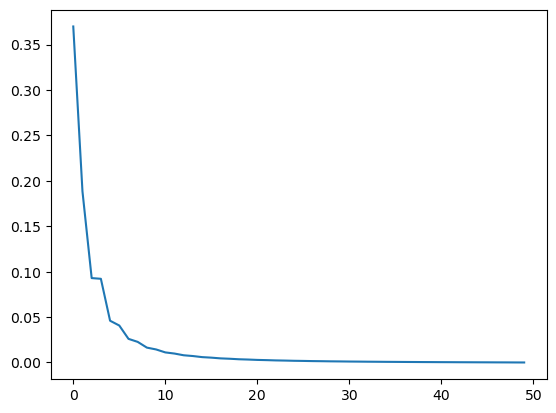

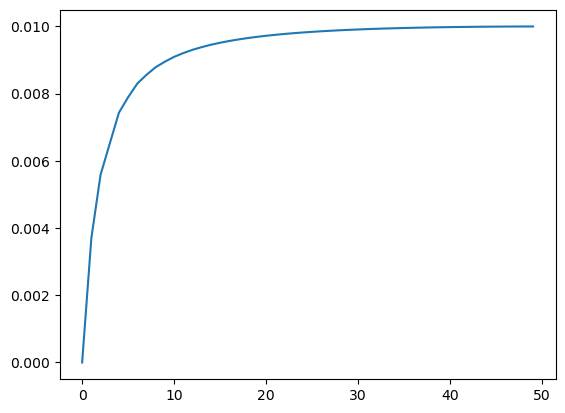

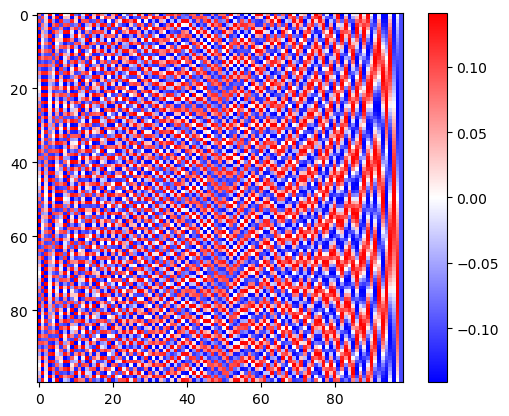

In [52]:
N = 100
M = int(np.sqrt(N) * np.log(N))
beta = 1
wz = 1
J0s = np.linspace(0.1, 2.0, 50)
alpha = 0.3

gs = 0.00 * np.ones(N)

J = interactions.powerlaw_pbc(N, alpha)
plt.imshow(J - np.diag(np.diag(J)))
plt.colorbar()
plt.show()
J, b = interactions.shift(J, 0.0, return_shift=True)
plt.imshow(J - np.diag(np.diag(J)))
plt.colorbar()
plt.show()
_, S = interactions.rescale(J, return_scale=True)
S = np.sum(np.abs(J[1:, 0]))
print(J[0, 0])
print(S)
J = J / (S + b)

plt.imshow(J - np.diag(np.diag(J)))
plt.colorbar()
plt.show()

from scipy.linalg import eigvalsh
ds = eigvalsh(J)
print(f'Eigvals: {ds}')
ws, lams = utils.dicke_from_ising(J, 1e-6)
print(ws)
eig_density = 1 / ds[1::2] - ds[:-1:2]
eig_density /= np.sum(eig_density)
plt.plot(eig_density)
plt.show()
eig_density = 1 / ds[1::2] - ds[:-1:2]
eig_density /= np.sum(eig_density)
plt.plot([np.sum(eig_density[:n]) / N for n in range(len(eig_density))])
plt.show()
plt.imshow(lams, cmap='bwr')
plt.colorbar()
plt.show()

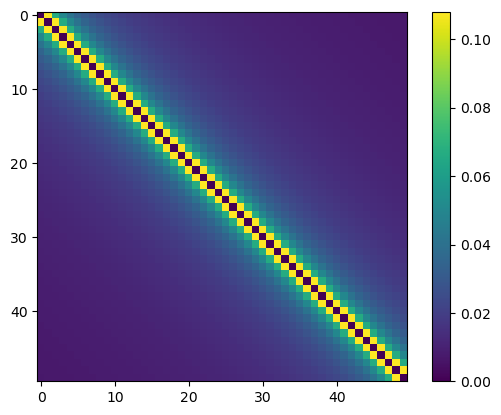

Eigvals: [1.61072005e-16 2.14081805e-04 5.71413898e-04 1.07321602e-03
 1.72033344e-03 2.51532799e-03 3.45916221e-03 4.55614021e-03
 5.80707210e-03 7.21847441e-03 8.79073115e-03 1.05331359e-02
 1.24453604e-02 1.45401674e-02 1.68162085e-02 1.92905812e-02
 2.19605777e-02 2.48487325e-02 2.79505978e-02 3.12955773e-02
 3.48770486e-02 3.87331830e-02 4.28546853e-02 4.72910656e-02
 5.20297841e-02 5.71352577e-02 6.25910583e-02 6.84815946e-02
 7.47858592e-02 8.16157321e-02 8.89449741e-02 9.69243462e-02
 1.05522006e-01 1.14945782e-01 1.25158771e-01 1.36456455e-01
 1.48800027e-01 1.62627648e-01 1.77909128e-01 1.95333353e-01
 2.14911304e-01 2.37821279e-01 2.64222054e-01 2.96405696e-01
 3.35088905e-01 3.85806244e-01 4.52000680e-01 5.54335823e-01
 7.22658479e-01 1.34605331e+00]
[4.67111158e+03 1.75004494e+03 9.31778860e+02 5.81282660e+02
 3.97562467e+02 2.89087339e+02 2.19484027e+02 1.72203820e+02
 1.38533427e+02 1.13756181e+02 9.49384884e+01 8.03512290e+01
 6.87749993e+01 5.94664368e+01 5.18387700e+0

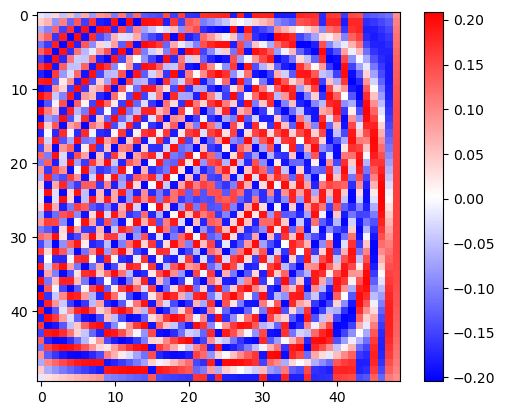

array([-2.26742752e-03, -5.37764278e-16,  4.55633201e-03,  6.93889390e-18,
        6.88892322e-03, -4.85722573e-16,  9.28892884e-03, -6.80011603e-16,
        1.17824909e-02,  1.04083409e-15, -1.43992463e-02,  9.85322934e-16,
       -1.71736891e-02,  5.13478149e-16, -2.01469522e-02, -5.27355937e-16,
       -2.33692104e-02, -3.05311332e-16, -2.69030144e-02,  4.44089210e-16,
       -3.08280364e-02, -5.27355937e-16,  3.52480120e-02, -6.38378239e-16,
        4.03011815e-02,  6.10622664e-16, -4.61764992e-02,  1.11022302e-16,
       -5.31396996e-02, -2.77555756e-16,  6.15769806e-02, -1.55431223e-15,
       -7.20718628e-02,  3.88578059e-16, -8.55486365e-02, -9.99200722e-16,
        1.03560386e-01, -4.99600361e-16, -1.28923904e-01, -1.80411242e-15,
        1.67304334e-01,  2.52575738e-15,  2.31926315e-01, -8.32667268e-17,
       -3.61929994e-01,  2.27595720e-15, -7.40551719e-01,  9.71445147e-17,
        7.01312405e+00])

In [12]:
N = 50
M = int(np.sqrt(N) * np.log(N))
beta = 1
wz = 1
J0s = np.linspace(0.1, 2.0, 50)
alpha = 0.7

gs = 0.00 * np.ones(N)

J = interactions.powerlaw_obc(N, alpha)
J = interactions.shift(J, 0.0)
J = interactions.rescale(J)
plt.imshow(J - np.diag(np.diag(J)))
plt.colorbar()
plt.show()


ds = eigvalsh(J)
print(f'Eigvals: {ds}')
ws, lams = utils.dicke_from_ising(J, 1e-6)
print(ws)
plt.imshow(lams, cmap='bwr')
plt.colorbar()
plt.show()
np.sum(lams, axis=0)

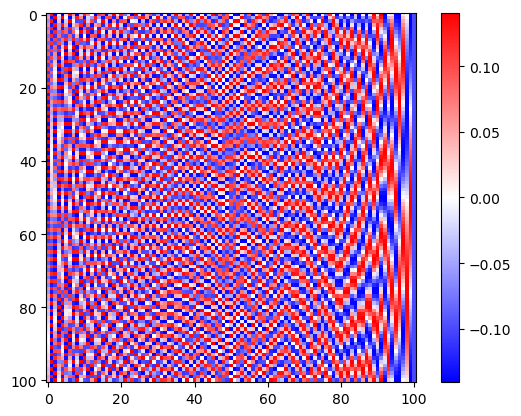

array([-9.64506253e-16,  9.99200722e-16, -8.32667268e-17, -5.45136852e-16,
        1.38777878e-16,  2.28983499e-16,  3.33066907e-16,  2.35922393e-16,
       -3.60822483e-16, -1.17961196e-16,  1.80411242e-16,  1.80411242e-16,
        4.16333634e-17, -4.16333634e-16,  1.38777878e-16,  2.63677968e-16,
       -4.16333634e-16, -2.01227923e-16,  3.60822483e-16,  1.24900090e-16,
        4.85722573e-16, -8.32667268e-17, -2.91433544e-16, -1.94289029e-16,
        8.46545056e-16,  2.22044605e-16, -2.01227923e-16, -2.22044605e-16,
        2.46330734e-16,  5.55111512e-17,  1.38777878e-17, -1.52655666e-16,
        1.80411242e-16,  0.00000000e+00, -2.22044605e-16,  7.97972799e-17,
       -2.77555756e-17,  3.46944695e-17, -1.11022302e-16,  1.37910516e-16,
       -2.22044605e-16, -5.55111512e-17, -2.77555756e-17, -1.83880688e-16,
        4.16333634e-16,  3.72965547e-17, -2.49800181e-16,  2.22044605e-16,
        5.27355937e-16,  8.32667268e-17,  3.33066907e-16,  6.27753058e-16,
       -1.66533454e-16,  

In [12]:
N = 100
M = int(np.sqrt(N) * np.log(N))
alpha = 0.3

J = interactions.powerlaw_pbc(N, alpha)

vals, vects = eigh(J)
plt.imshow(vects, cmap='bwr')
plt.colorbar()
plt.show()
np.sum(vects, axis=0)

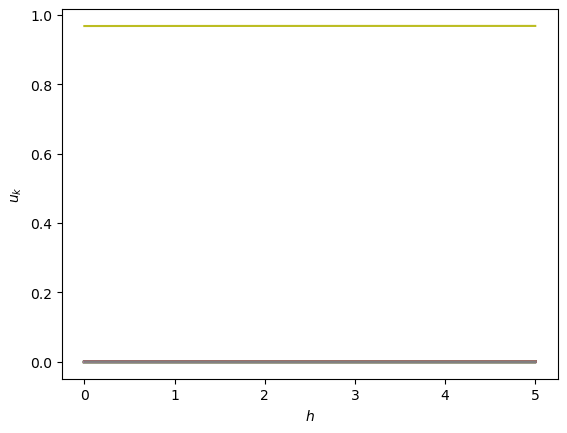

In [2]:
N = 100
M = int(np.sqrt(N) * np.log(N))
beta = 10
wz = 1
J0 = 1
alpha = 0.9

gs = 0.00 * np.ones(N)


g0s = np.linspace(0, 5, 20)

J = interactions.powerlaw_pbc(N, alpha)
J = interactions.shift(J, 0.0)
J = J0 * interactions.rescale(J)
ws, lams = utils.dicke_from_ising(J, 1e-6)

ukss = []
for g0 in g0s:
    gs[0] = g0
    #print(ws[-1] * J0)
    #print(np.sqrt(N) * lams[:, 0])
    #plt.imshow(lams)
    #plt.show()
    #ws, lams = utils.truncate_dicke(ws, lams, M)
    mags, uks = dicke.mag_longitudinal_debug(beta, wz, ws, np.sqrt(N) * lams, gs, N)
    ukss.append(uks)

plt.plot(g0s, ukss)
#plt.axvline(0.25, c='k', lw=0.5)
#plt.axhline(1.00, c='k', lw=0.5)
plt.xlabel(r'$h$')
plt.ylabel(r'$u_k$')
plt.show()

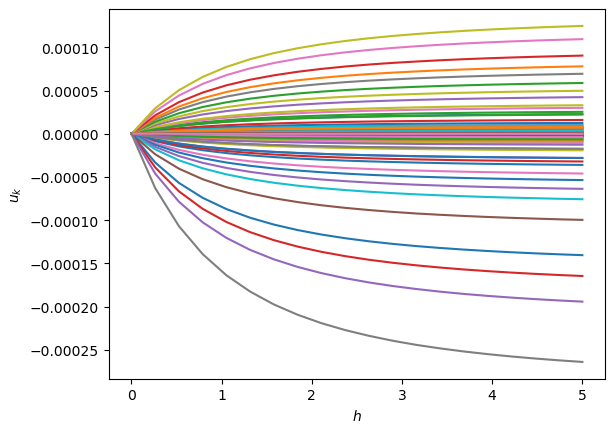

In [3]:
ukss = []
for g0 in g0s:
    gs[0] = g0
    #print(ws[-1] * J0)
    #print(np.sqrt(N) * lams[:, 0])
    #plt.imshow(lams)
    #plt.show()
    #ws, lams = utils.truncate_dicke(ws, lams, M)
    mags, uks = dicke.mag_longitudinal_debug(beta, wz, ws, np.sqrt(N) * lams, gs, N)
    ukss.append(uks[:-1])

plt.plot(g0s, ukss)
#plt.axvline(0.25, c='k', lw=0.5)
#plt.axhline(1.00, c='k', lw=0.5)
plt.xlabel(r'$h$')
plt.ylabel(r'$u_k$')
plt.show()

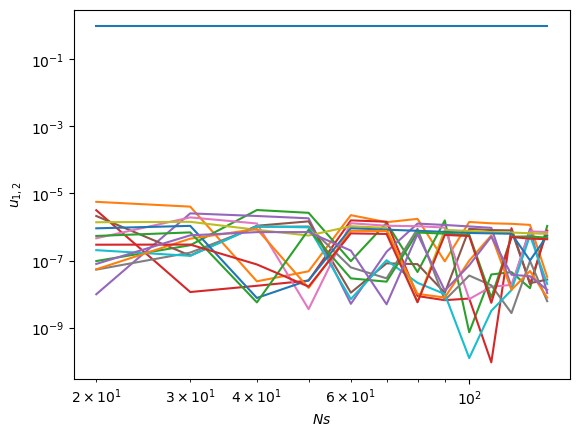

In [7]:
Ns = np.arange(20, 150, 10)
J0 = 1
beta = 10
wz = 1
alpha = 0.9


ukss = []
for N in Ns:
    J = interactions.powerlaw_pbc(N, alpha)
    J = interactions.shift(J, 0.0)
    J = J0 * interactions.rescale(J)
    ws, lams = utils.dicke_from_ising(J, 1e-6)

    gs = 0.00 * np.ones(N)
    g0 = 0.005
    gs[0] = g0
    M = int(np.sqrt(N) * np.log(N))
    #print(ws[-1] * J0)
    #print(np.sqrt(N) * lams[:, 0])
    #plt.imshow(lams)
    #plt.show()
    #ws, lams = utils.truncate_dicke(ws, lams, M)
    mags, uks = dicke.mag_longitudinal_debug(beta, wz, ws, np.sqrt(N) * lams, gs, N)
    uks = np.abs(uks[::-1])
    ukss.append(uks[:15])

plt.plot(Ns, ukss)
#plt.axvline(0.25, c='k', lw=0.5)
#plt.axhline(1.00, c='k', lw=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$Ns$')
plt.ylabel(r'$u_{1, 2}$')
plt.show()

35


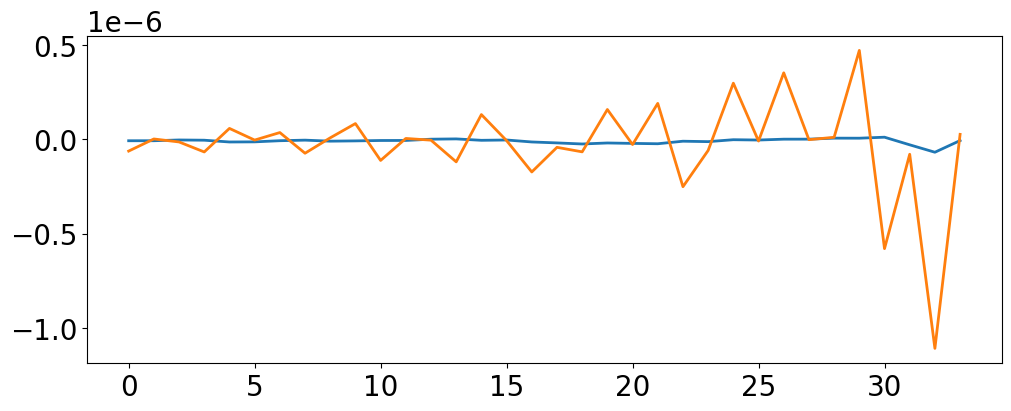

/var/folders/54/wwvz2d1s1v7ck12y_l10q3pw0000gn/T/ipykernel_59377/729552395.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [4]:
import matplotlib.pyplot as plt
import numpy as np

import plot
import algo


plot.set_rcParams(size = (10, 4), lw = 2, fs = 20)

fig, axes = plt.subplots(1, 1, constrained_layout=True)


ax = axes

N = 70
M = int(np.sqrt(N) * np.log(N))
print(M)

beta = 10
wz = 1
J0s = [1.0]
alphas = [0.5]

dg = 5e-3 * wz

i = 0
j = N//2

cmap = plt.get_cmap('viridis')
colors = iter(cmap(np.linspace(0.9, 0.1, len(alphas))))
for alpha in alphas:
    susc = []

    for J0 in J0s:
        gs = 0.0 * np.ones(N)
        mxs0, uks0 = algo.lrising_mags_debug(wz, J0, alpha, gs, beta, N, M)
        gs[i] = dg
        mxs1, uks1 = algo.lrising_mags_debug(wz, J0, alpha, gs, beta, N, M)
        plt.plot(uks0[:-1])
        plt.plot(uks1[:-1])
        plt.show()
        susc.append(((mxs1 - mxs0) / dg)[j])
    
    ax.plot(J0s, susc, c=next(colors), label=alpha)

ax.axvline(0.25, c='k', lw=0.5)
ax.set_yscale('log')
#ax.set_ylim(1e-4, 1e2)
#ax.set_xscale('log')
ax.set_ylabel(r'$\chi_{N/2} \omega_z $')
ax.set_xlabel(r'$\Gamma / \omega_z$')
ax.legend(frameon=False, title=r'$\alpha$')

fig.show()
#fig.savefig(f'plots/half_chain_susceptibility_{N}_alt.pdf', bbox_inches='tight', dpi=300)

/Users/jroman/Desktop/Code/long_range_ising/dicke.py:45: RuntimeWarning: overflow encountered in cosh
  return beta * np.sum(ws * xs**2) - 1/N * np.sum(np.log(2 * np.cosh(0.5 * beta * np.sqrt(wz**2 + 4*aux**2))))
/Users/jroman/miniconda3/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/jroman/Desktop/Code/long_range_ising/dicke.py:45: RuntimeWarning: overflow encountered in cosh
  return beta * np.sum(ws * xs**2) - 1/N * np.sum(np.log(2 * np.cosh(0.5 * beta * np.sqrt(wz**2 + 4*aux**2))))
/Users/jroman/miniconda3/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/jroman/Desktop/Code/long_range_ising/dicke.py:45: RuntimeWarning: overflow encountered in cosh
  return beta * np.sum(ws * xs**2) - 1/N * np.sum(np.log(2 * np.cosh(0.5 * beta * np.sqrt(wz**2 + 4*aux**2))))
/Users/jroman/miniconda3/lib/python3.10/sit

2.2222222222222223
0.08368259344341988


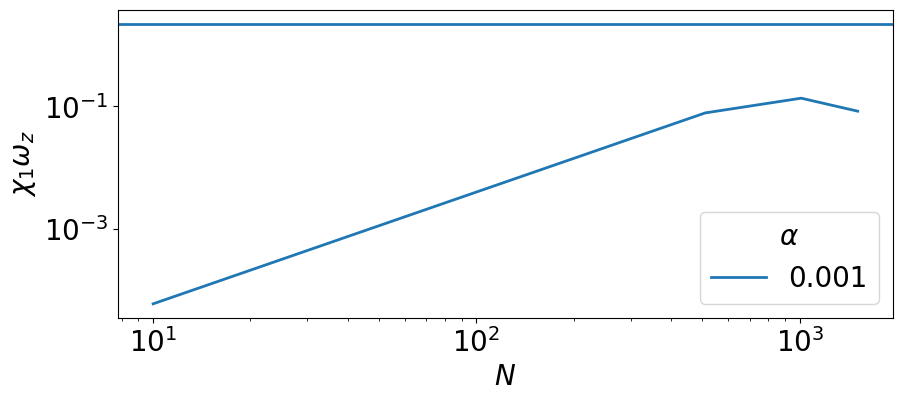

In [5]:
import matplotlib.pyplot as plt
import numpy as np

import plot
import algo
import interactions


plot.set_rcParams(size = (10, 4), lw = 2, fs = 20)

Ns = np.arange(10, 2000, 500)

beta = 10
wz = 1
J0 = 0.01
alphas = [0.001]

dg = 5e-3 * wz
i = 0
j = 1

for alpha in alphas:
    susc = []
    for N in Ns:
        M = int(np.sqrt(N) * np.log(N))
        #J = interactions.powerlaw_pbc(N, alpha)
        #J = interactions.shift(J, 0.0)
        #J, S  = J0 * interactions.rescale(J, return_scale=True)
        
        gs = 0.0 * np.ones(N)
        mxs0, uks0 = algo.lrising_mags_debug(wz, J0, alpha, gs, beta, N, M)
        gs[i] = dg
        mxs1, uks1 = algo.lrising_mags_debug(wz, J0, alpha, gs, beta, N, M)
        #plt.plot(np.abs(uks0))
        #plt.plot(np.abs(uks1))
        #plt.yscale('log')
        #plt.yscale('log')
        #plt.show()
        susc.append(((mxs1 - mxs0) / dg)[j])
        
    plt.plot(Ns, susc, label=alpha)
plt.axhline(beta**2 * 2 * J0 / (1 - beta*J0))
print(beta**2 * 2 * J0 / (1 - beta*J0))
print(susc[-1])
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\chi_{1} \omega_z $')
plt.xlabel(r'$N$')
plt.legend(title=r'$\alpha$')

plt.show()

In [14]:
import matplotlib.pyplot as plt
import numpy as np

import plot
import algo
import interactions


plot.set_rcParams(size = (10, 4), lw = 2, fs = 20)

N = 500

beta = 1
wz = 1
J0 = 0.166666666666666
alpha = 0.5

dg = 5e-3 * wz
i = 0
j = 1


M = int(np.sqrt(N) * np.log(N))

gs = 0.0 * np.ones(N)
mxs0, uks0 = algo.lrising_mags_debug(wz, J0, alpha, gs, beta, N, M)
Ys = algo.Ys_f(wz, J0, alpha, gs, beta, N, M)
print(Ys)
print(len(Ys))
gs[i] = dg
mxs1, uks1 = algo.lrising_mags_debug(wz, J0, alpha, gs, beta, N, M)
susc = ((mxs1 - mxs0) / dg)[j]

print(8 * J0 / (1 - 4 * J0))
print(N * susc)


[0.92423431 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431
 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431
 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431
 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431
 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431
 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431
 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431
 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431
 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431
 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431
 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431
 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431
 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431
 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431
 0.92423431 0.92423431 0.92423431 0.92423431 0.92423431 0.9242

[1.00000000e-04 1.20679264e-04 1.45634848e-04 1.75751062e-04
 2.12095089e-04 2.55954792e-04 3.08884360e-04 3.72759372e-04
 4.49843267e-04 5.42867544e-04 6.55128557e-04 7.90604321e-04
 9.54095476e-04 1.15139540e-03 1.38949549e-03 1.67683294e-03
 2.02358965e-03 2.44205309e-03 2.94705170e-03 3.55648031e-03
 4.29193426e-03 5.17947468e-03 6.25055193e-03 7.54312006e-03
 9.10298178e-03 1.09854114e-02 1.32571137e-02 1.59985872e-02
 1.93069773e-02 2.32995181e-02 2.81176870e-02 3.39322177e-02
 4.09491506e-02 4.94171336e-02 5.96362332e-02 7.19685673e-02
 8.68511374e-02 1.04811313e-01 1.26485522e-01 1.52641797e-01
 1.84206997e-01 2.22299648e-01 2.68269580e-01 3.23745754e-01
 3.90693994e-01 4.71486636e-01 5.68986603e-01 6.86648845e-01
 8.28642773e-01 1.00000000e+00]


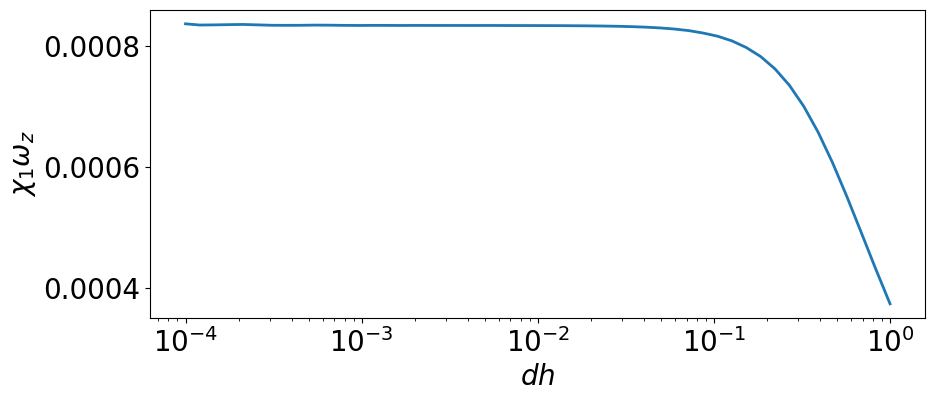

In [10]:
import matplotlib.pyplot as plt
import numpy as np

import plot
import algo


plot.set_rcParams(size = (10, 4), lw = 2, fs = 20)

N = 100
M = int(np.sqrt(N) * np.log(N))
beta = 10
wz = 1
J0 = 0.01
alpha = 0.001

dg = 10e-3 * wz
dgs = np.logspace(-4, 0, 50)
#dgs = np.linspace(0.0001, 0.1, 20)
print(dgs)
i = 0
j = 4

susc = []
for dg in dgs:
    gs = 0.0 * np.ones(N)
    mxs0, uks0 = algo.lrising_mags_debug(wz, J0, alpha, gs, beta, N, M)
    gs[i] = dg
    mxs1, uks1 = algo.lrising_mags_debug(wz, J0, alpha, gs, beta, N, M)
    #plt.plot(np.abs(uks0))
    #plt.plot(np.abs(uks1))
    #plt.yscale('log')
    #plt.yscale('log')
    #plt.show()
    susc.append(((mxs1 - mxs0) / dg)[j])
        
plt.plot(dgs, susc)
    
#plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\chi_{1} \omega_z $')
plt.xlabel(r'$dh$')

plt.show()

In [7]:
import numpy as np
from scipy.linalg import eigvalsh

N = 40
M = np.diag(np.ones(N-1), k=1)
M += np.diag(np.ones(N-1), k=-1)

vals = eigvalsh(M)

print(min(vals))

-1.9941316023674809


In [10]:

import numpy as np
from scipy.linalg import eigvalsh

N = 40
M = np.ones(N) - np.eye(N)

vals = eigvalsh(M)

print(min(vals))

-1.0000000000000204


In [10]:
a = np.ones((5, 3))
a[0] = 3
b = 2 * np.ones(3)
print(a)
print(b)
print(b * a)

[[3. 3. 3.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[2. 2. 2.]
[[6. 6. 6.]
 [2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]
